# Pre-class data

As a table, you will work to develop a model using the data one of you found online.

1. Within each group, come to a consensus on which data set to use.
1. Come up with a proposal for some functional form that might describe the data (ask me for help if you are unsure).
1. Add the proposed model to the narrative description in the notebook of the person who provided the data (including the function typeset in LaTex)

Each table will then present their data and proposed model. We will select one tables proposal as a class and then fit the data with their proposed model

# Fitting data (i.e. getting the *model parameters*)



In [1]:
import numpy as np #used for arrays and numerical functions
import pandas as pd #used for reading a data file
import matplotlib.pyplot as plt #used for graphing
from io import StringIO #used to convert string to a dataframe
from scipy.optimize import curve_fit #used to find the fit parameters

[ 2.69332580e+08  9.11816358e+01 -3.77577941e+02  2.43028955e-01
 -4.39642658e-05]


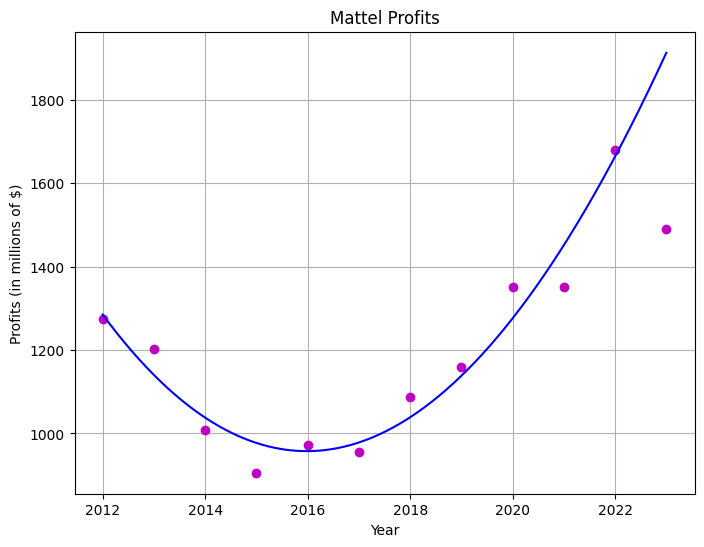

In [14]:
# We will copy selected group's notebook here and then modify to fit the data
# and extract the model parameters
data = StringIO('''
x,y
2012,1275
2013,1202
2014,1009
2015,906
2016,972
2017,955
2018,1088
2019,1159
2020,1350
2021,1350
2022,1679
2023,1490
''')


# convert data to dataframe
df = pd.read_csv(data, sep =",")

# define arrays for the data
xdata = df['x']
ydata = df['y']


model = lambda x,a,b,c,d,e: a + b*x +c*x**2+d*x**3+e*x**4
guess = [1,1,1,1,1]

params, covarience = curve_fit(model, xdata[:-1], ydata[:-1], p0=guess)

xmodel = np.linspace(2012,2023,1000)
ymodel = model(xmodel, *params)

print(params)
# plot data and the best-fit function on the same graph
fig = plt.figure(figsize=(8,6))
plt.title("Mattel Profits")
plt.xlabel('Year')
plt.ylabel('Profits (in millions of $)')
plt.grid(which='both', axis='both')
plt.plot(xdata, ydata, 'mo')
plt.plot(xmodel,ymodel,"b-")
plt.show()

Below is some skelaton code for fitting data using the `scipy.optimize` package. It's mostly here so I can refrence it when I forget a random function name.

[1.28571429 0.57142857]


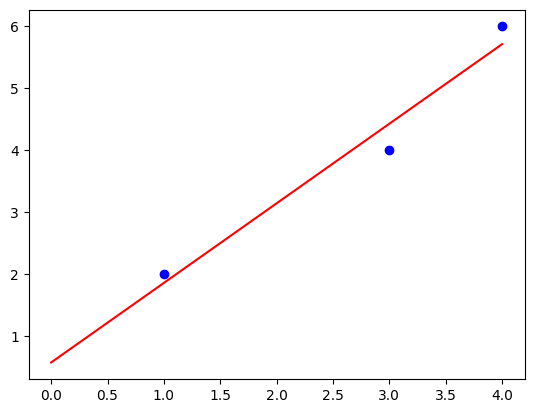

In [5]:
# Import data
data = StringIO("""x,y
1,2
3,4
4,6
""")
df = pd.read_csv(data)

# Define the model
model = lambda x,m,b: m*x+b # Note the independent variable **must** be first, followed by the model parameters

xdata = df['x']
ydata = df['y']

# Determine the optimal value of our model parameters (fit the model)
guess = [1,1] # Our initial guess for the model parameters
params, covariance = curve_fit(model, xdata, ydata, p0=guess) #params contains the fit model parameters
print(params)

# Generate points of the model to plot
xmodel = np.linspace(0,4,100)
ymodel = model(xmodel, *params)


plt.plot(xdata,ydata,'bo')
plt.plot(xmodel,ymodel,'r-')
plt.show()